In [45]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Imports

In [46]:
import numpy as np
from pylamp.neural.layers import Linear
from pylamp.optim.optimizer import Optim, SGD
from pylamp.loss.losses import MSELoss, BCELoss, RMSELoss
from pylamp.utils.plotter import Display
from pylamp.utils.data import DataGenerator as dg 
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

This notebook will be split on two parts, in the first one we will experiment with random generated data, and the second one will be with real data

# Random Generated Data


## Training on Regression task

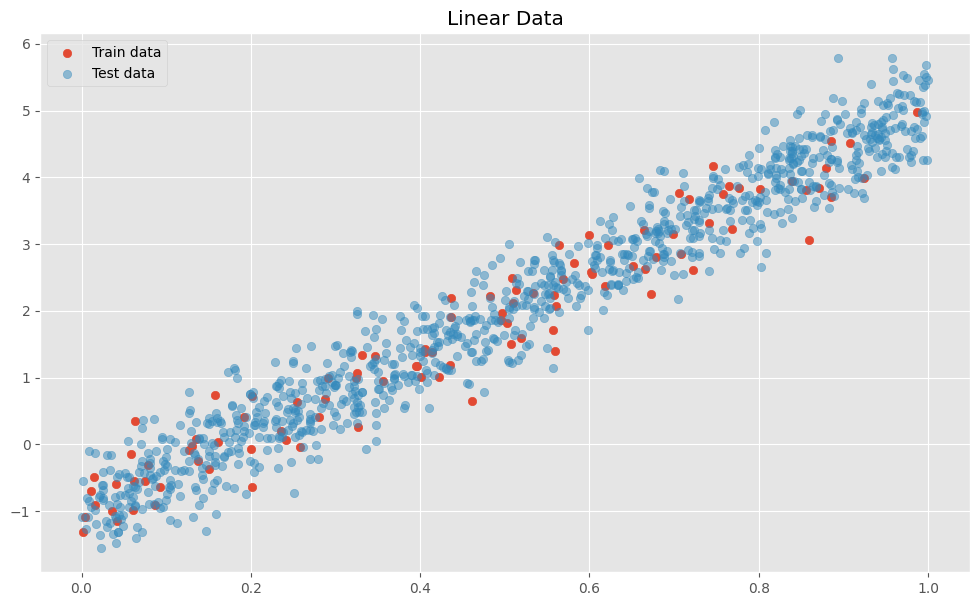

In [47]:
X_train, X_test,y_train,y_test  = dg.generate_linear_data()
dg.plot_linear_data(X_train, y_train, X_test, y_test, title='Linear Data', alpha_train=1, alpha_test=0.5)

**Model, loss and optimizer**

In [48]:
input_size = X_train.shape[1]
output_size = y_train.shape[1]
print(f'input_size: {input_size}, output_size: {output_size}')
model = Linear(input_size, output_size, use_bias=True)
loss = MSELoss()

optimizer_linear = Optim(model,loss,1e-2)

model_linear_losses = SGD(optimizer_linear,X_train, y_train, batch_size=10,epochs=300,verbose=True)


input_size: 1, output_size: 1
Epoch 1/300, Average Loss: 11.872152508348757
Epoch 31/300, Average Loss: 0.9336167930078247
Epoch 61/300, Average Loss: 0.5304137037358879
Epoch 91/300, Average Loss: 0.33567474268598124
Epoch 121/300, Average Loss: 0.24175602418205328
Epoch 151/300, Average Loss: 0.19681239797182512
Epoch 181/300, Average Loss: 0.1750444136644989
Epoch 211/300, Average Loss: 0.16437944221228318
Epoch 241/300, Average Loss: 0.15946788442872473
Epoch 271/300, Average Loss: 0.1569770167544804
Training finished.


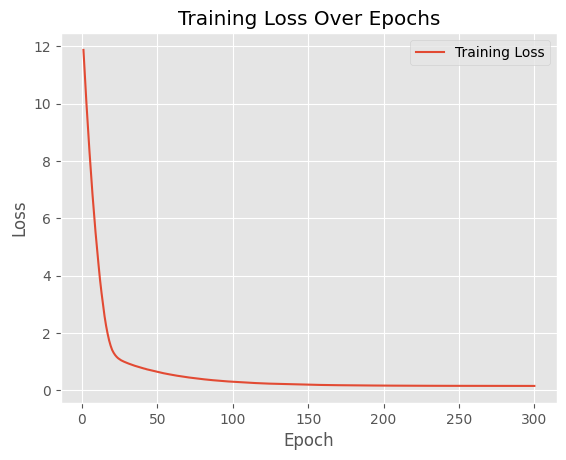

In [49]:
Display().plot_loss(model_linear_losses)

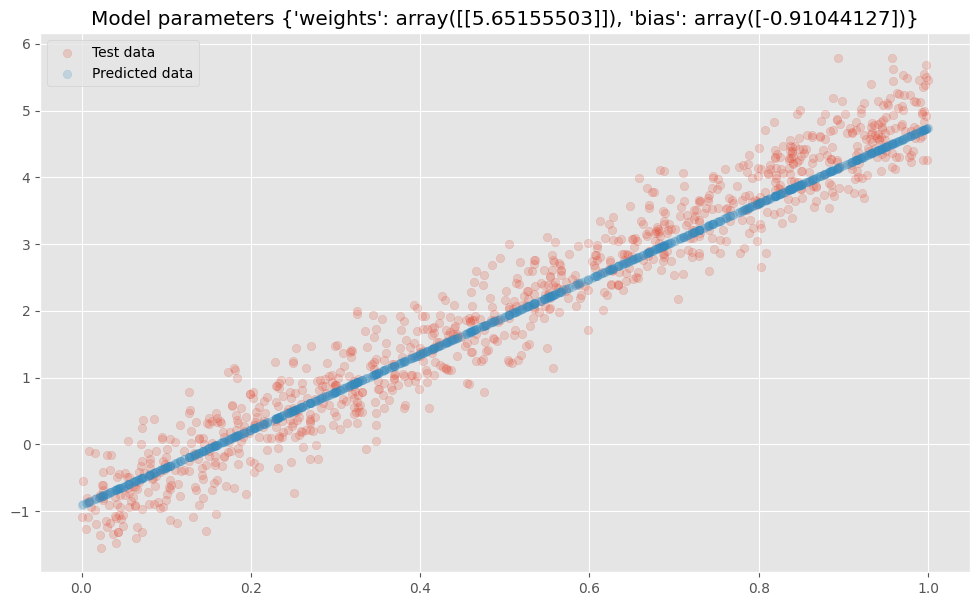

In [50]:
output = model.forward(X_test.reshape(-1,1))
title = f"Model parameters {model.parameters}"
dg.plot_linear_data(X_test, y_test, X_test, output, title_train="Test data",title_test="Predicted data", title=title)

## Training on Classification Task

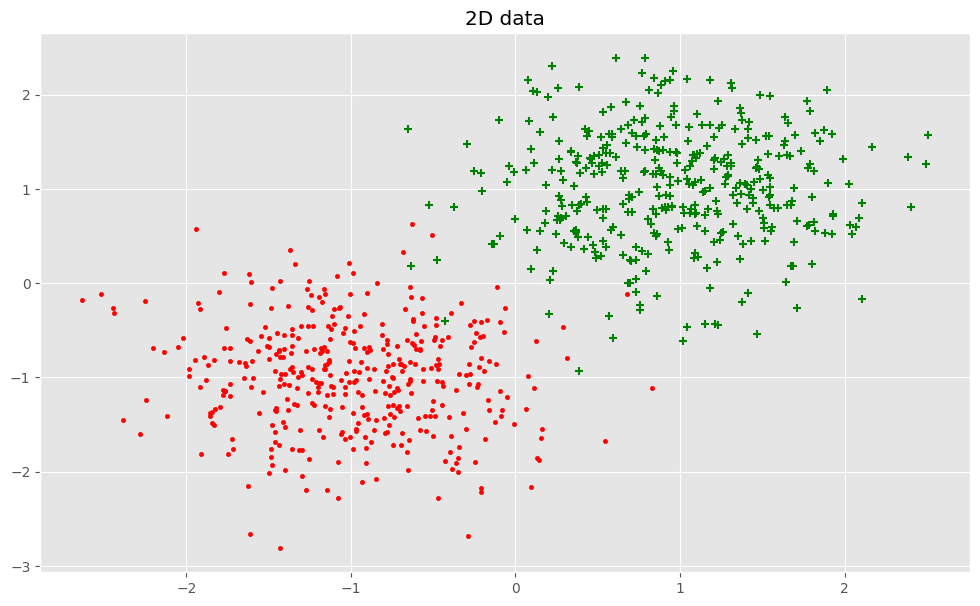

In [51]:
X_train, X_test, y_train, y_test  = dg.generate_2D_data(data_type=0, epsilon=0.5)
dg.plot_2D_data(X_train, y_train)

**Model, loss and optimizer**

In [52]:
input_size = X_train.shape[1]
output_size = y_train.shape[1]
print(f'input_size: {input_size}, output_size: {output_size}')
model = Linear(input_size, output_size, use_bias=True)
loss = BCELoss()

optimizer_linear = Optim(model,loss,1e-3)

model_linear_losses = SGD(optimizer_linear,X_train, y_train, batch_size=10,epochs=300,verbose=True)


input_size: 2, output_size: 1
Epoch 1/300, Average Loss: 17.756522179533757
Epoch 31/300, Average Loss: 0.15266075264233198
Epoch 61/300, Average Loss: 0.14636528345960859
Epoch 91/300, Average Loss: 0.1472163617329103
Epoch 121/300, Average Loss: 0.173683240089256
Epoch 151/300, Average Loss: 0.1742485039303081
Epoch 181/300, Average Loss: 0.17495185719376702
Epoch 211/300, Average Loss: 0.1759370211228571
Epoch 241/300, Average Loss: 0.17735180799810543
Epoch 271/300, Average Loss: 0.18502154035527976
Training finished.


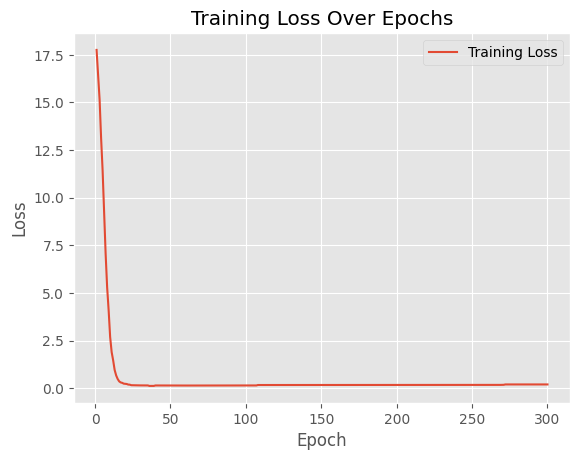

In [53]:
Display().plot_loss(model_linear_losses)

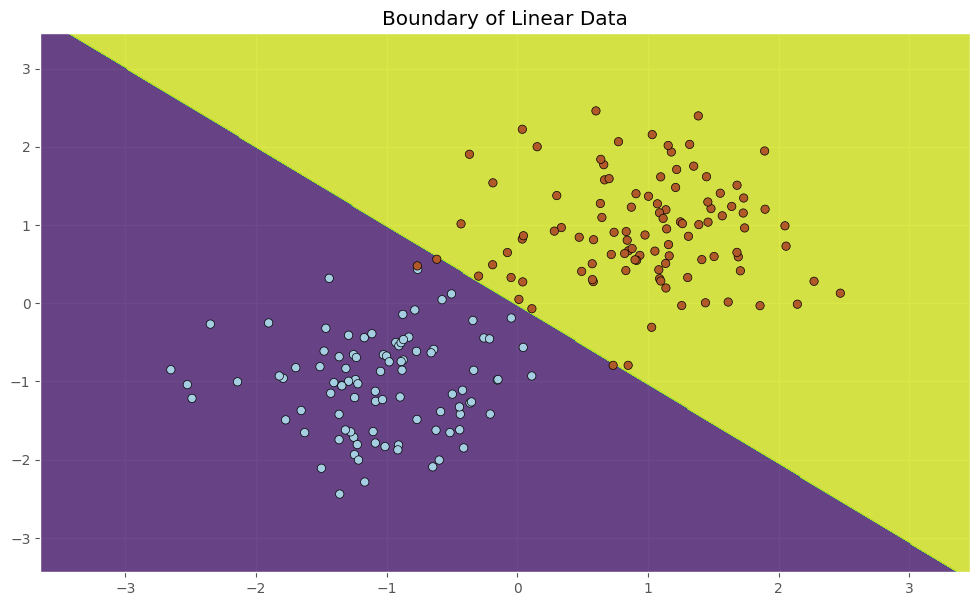

In [54]:
dg.plot_decision_boundary(X_test, y_test, model, "Boundary of Linear Data")

# Real life use case

in this part we will be testing our linear Module with a Diabetes Dataset, the goal is to predict the disease progression one year after baseline based on ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements.

### Loading the data

In [55]:
data = load_diabetes()
X = data.data
y = data.target.reshape(-1,1)

In [56]:
print(f"{X.shape=}")
print(f"{y.shape=}")

X.shape=(442, 10)
y.shape=(442, 1)


### Preprocessing

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # features scaling
scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Building the model

Linear(10, 1)

In [58]:
input_size = X_train.shape[1]
output_size = y_train.shape[1]

model = Linear(input_size, output_size, use_bias=True)
loss = RMSELoss()

optimizer_linear = Optim(model,loss,1e-2)

model_linear_losses = SGD(optimizer_linear,X_train, y_train, batch_size=1,epochs=150,verbose=True)


Epoch 1/150, Average Loss: 151.84446539606697
Epoch 16/150, Average Loss: 101.76347969450904
Epoch 31/150, Average Loss: 70.02559904650462
Epoch 46/150, Average Loss: 55.42979795806979
Epoch 61/150, Average Loss: 48.62911974571294
Epoch 76/150, Average Loss: 45.54099640261897
Epoch 91/150, Average Loss: 44.51732620924497
Epoch 106/150, Average Loss: 44.04830479276581
Epoch 121/150, Average Loss: 43.92700973471257
Epoch 136/150, Average Loss: 43.89163968289425
Training finished.


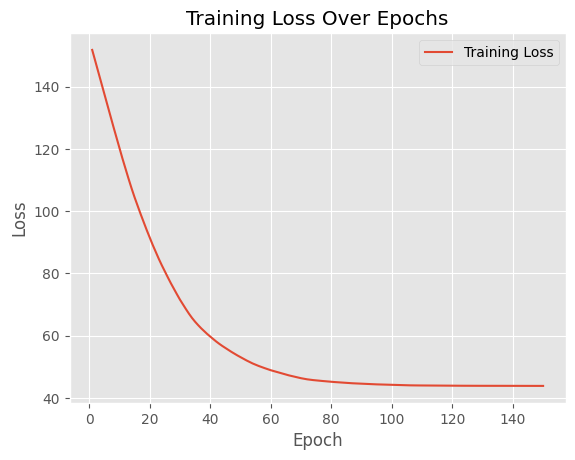

In [59]:
Display().plot_loss(model_linear_losses)

In [60]:
# Evaluate the model on the test set
y_test_pred = model.forward(X_test)
rmse_test = RMSELoss().forward(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f'Test MSE: {rmse_test}')
print(f'Test R^2: {r2_test}')


Test MSE: 53.81153045243748
Test R^2: 0.45345453526423596
